# Problem Statement

In 2013 annual sales data, Bigmart is provided the data of 1559 products across 10 stores in different cities.

# import packages 

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics
# from sklearn.metrics import mean_absolute_error as MAE
# from sklearn.metrics import mean_squared_error as MSE
# from sklearn.metrics import r2_score as R2
# from sklearn.model_selection  import cross_val_score as CVS


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
import gc
import pickle
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams

# File Directory

Read the train and the test files from the local file path

print the train and test to look at the features

In [2]:
train_bigmart = pd.read_csv('C:\my files\Machine_learning_internship\9961_14084_bundle_archive\Train.csv')
test_bigmart = pd.read_csv('C:\my files\Machine_learning_internship\9961_14084_bundle_archive\Test.csv')
train_bigmart.shape

(8523, 12)

In [3]:
test_bigmart.shape

(5681, 11)

In [4]:
test_bigmart.isnull().sum() # check whether the null values appear or not both train and test set

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [5]:
train_bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_bigmart.describe() # Numerical features are computed their mean, standard deviation and so on.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test_bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Data Visualisation primarily for numerical features

<AxesSubplot:>

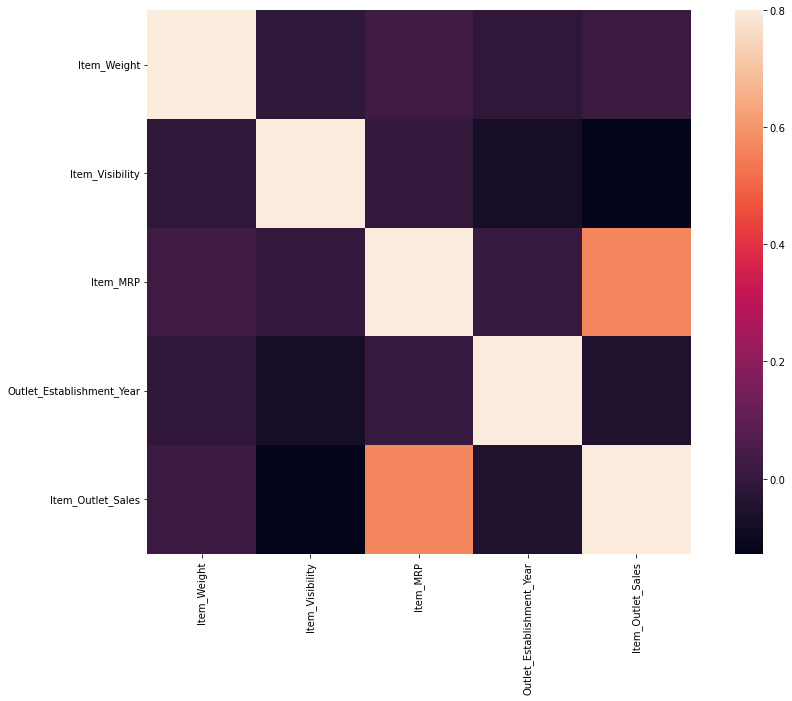

In [8]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(train_bigmart.corr(),vmax=0.8,square=True)

<AxesSubplot:>

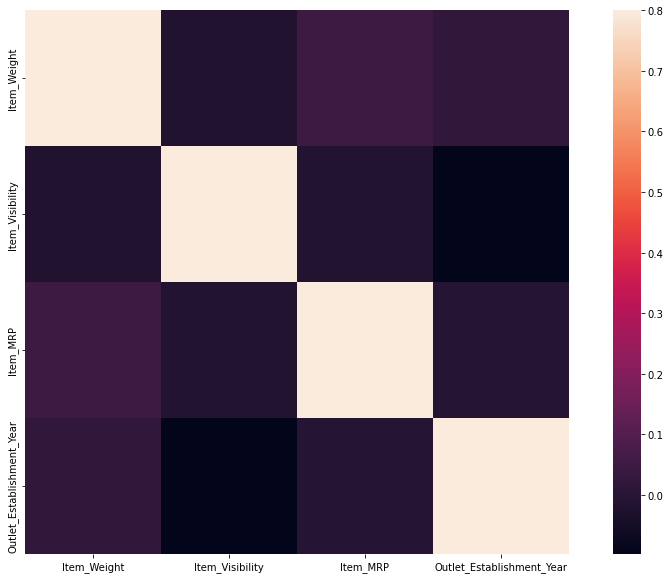

In [9]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(test_bigmart.corr(),vmax=0.8,square=True)

In [10]:
# fill the Null values in both in the train and the test set.
# From above, it is observed that the Item weight and Outlet size have Null varaibles
train_bigmart['Item_Weight'].fillna(value=train_bigmart['Item_Weight'].mean(),inplace=True)
test_bigmart['Item_Weight'].fillna(value=test_bigmart['Item_Weight'].mean(),inplace=True)

train_bigmart['Outlet_Size'].fillna(value='Unavailable',inplace=True)
test_bigmart['Outlet_Size'].fillna(value='Unavailable',inplace=True)

In [11]:
train_bigmart.isnull().sum() # recheck whether null variables still appear after replacement of their respective mean values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
test_bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


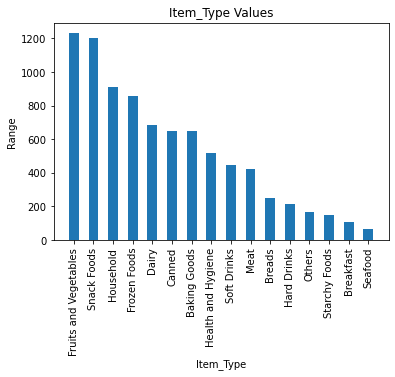

In [13]:
train_bigmart['Item_Type'].value_counts()
plt.bar(train_bigmart['Item_Type'].value_counts().index, train_bigmart['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train_bigmart)
plt.title('Item_Type Values')
plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Range')
print('Item_Type:\n',train_bigmart['Item_Type'].value_counts())

Item_Type:
 Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


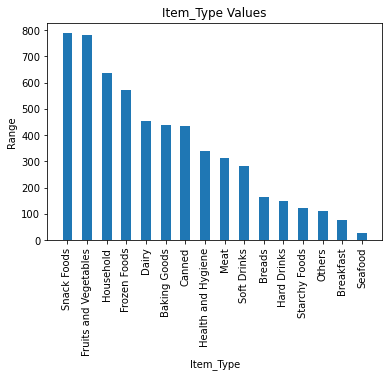

In [14]:
test_bigmart['Item_Type'].value_counts()
plt.bar(test_bigmart['Item_Type'].value_counts().index, test_bigmart['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=test_bigmart)
plt.title('Item_Type Values')
plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Range')
print('Item_Type:\n',test_bigmart['Item_Type'].value_counts())

In [15]:
# Let's categorize 'Item_Type' into 'Non consumables', 'Drinks' and 'Foods' according to the 'Item_Identifier'
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]
  
  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'

In [16]:
train_bigmart['Item_Type']=train_bigmart[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
test_bigmart['Item_Type']=test_bigmart[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

Item_Type:
 Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Type, dtype: int64


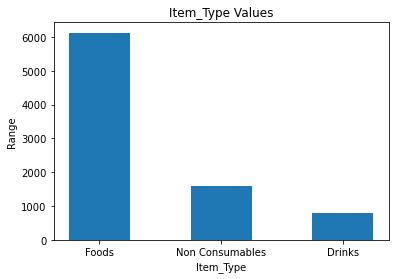

In [17]:
train_bigmart['Item_Type'].value_counts()
plt.bar(train_bigmart['Item_Type'].value_counts().index, train_bigmart['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train_bigmart)
plt.title('Item_Type Values')
plt.xlabel('Item_Type')
plt.ylabel('Range')
print('Item_Type:\n',train_bigmart['Item_Type'].value_counts())

Item_Type:
 Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Type, dtype: int64


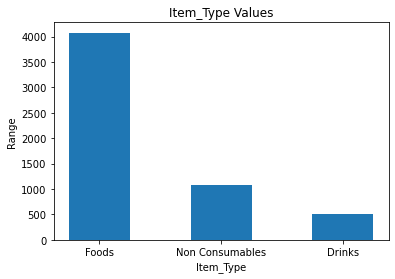

In [18]:
test_bigmart['Item_Type'].value_counts()
plt.bar(test_bigmart['Item_Type'].value_counts().index, test_bigmart['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=test_bigmart)
plt.title('Item_Type Values')
plt.xlabel('Item_Type')
plt.ylabel('Range')
print('Item_Type:\n',train_bigmart['Item_Type'].value_counts())

Text(0, 0.5, 'Range')

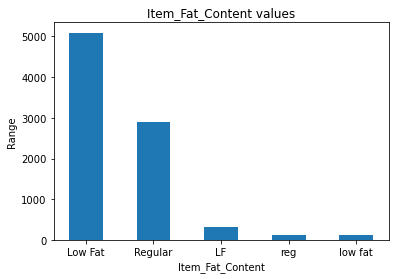

In [19]:
train_bigmart['Item_Fat_Content'].value_counts()
plt.bar(train_bigmart['Item_Fat_Content'].value_counts().index,train_bigmart['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=train_bigmart)
plt.title('Item_Fat_Content values')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Range')


Text(0, 0.5, 'Range')

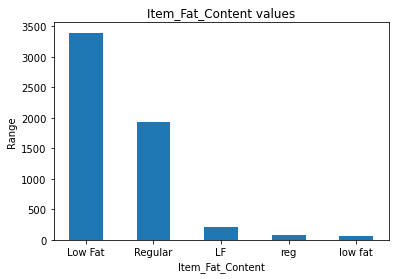

In [20]:
test_bigmart['Item_Fat_Content'].value_counts()
plt.bar(test_bigmart['Item_Fat_Content'].value_counts().index,test_bigmart['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=test_bigmart)
plt.title('Item_Fat_Content values')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Range')

In [21]:
# From the above graph we can see that there are actually two classes in 'Item_Fat_Content'. But some of the items are non consumables.  
def item_fat(cols):
  fat=cols[0]
  typ=cols[1]
  
  if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (typ=='Foods' or typ=='Drinks'):
    return 'Low Fat'
  elif (fat=='Regular' or fat=='reg') and (typ=='Foods' or typ=='Drinks'):
    return 'Regular'
  else:
    return 'Non Edible'

In [22]:
train_bigmart['Item_Fat_Content']=train_bigmart[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
test_bigmart['Item_Fat_Content']=test_bigmart[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

Text(0, 0.5, 'Range')

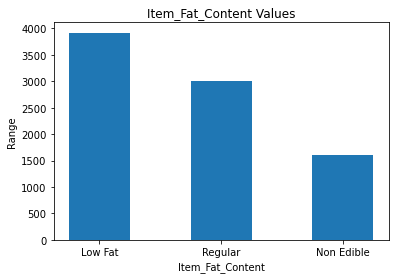

In [23]:
train_bigmart['Item_Fat_Content'].value_counts()
plt.bar(train_bigmart['Item_Fat_Content'].value_counts().index, train_bigmart['Item_Fat_Content'].value_counts(), width= 0.5, bottom=None , align='center', data=train_bigmart)
plt.title('Item_Fat_Content Values')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Range')


Text(0, 0.5, 'Range')

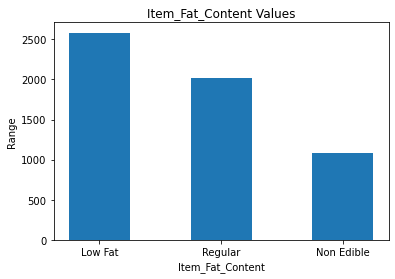

In [24]:
test_bigmart['Item_Fat_Content'].value_counts()
plt.bar(test_bigmart['Item_Fat_Content'].value_counts().index, test_bigmart['Item_Fat_Content'].value_counts(), width= 0.5, bottom=None , align='center', data=test_bigmart)
plt.title('Item_Fat_Content Values')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Range')

Text(0, 0.5, 'Range')

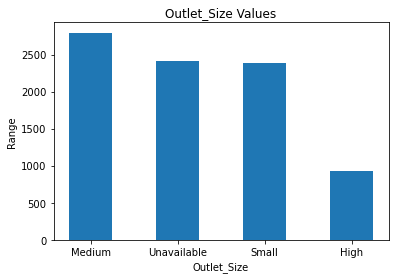

In [25]:
train_bigmart['Outlet_Size'].value_counts()
plt.bar(train_bigmart['Outlet_Size'].value_counts().index, train_bigmart['Outlet_Size'].value_counts(), width= 0.5, bottom=None , align='center', data=train_bigmart)
plt.title('Outlet_Size Values')
plt.xlabel('Outlet_Size')
plt.ylabel('Range')

Text(0, 0.5, 'Range')

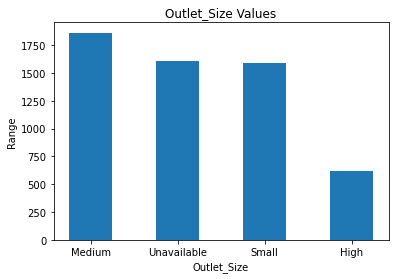

In [26]:
test_bigmart['Outlet_Size'].value_counts()
plt.bar(test_bigmart['Outlet_Size'].value_counts().index, test_bigmart['Outlet_Size'].value_counts(), width= 0.5, bottom=None , align='center', data=test_bigmart)
plt.title('Outlet_Size Values')
plt.xlabel('Outlet_Size')
plt.ylabel('Range')

Text(0, 0.5, 'Range')

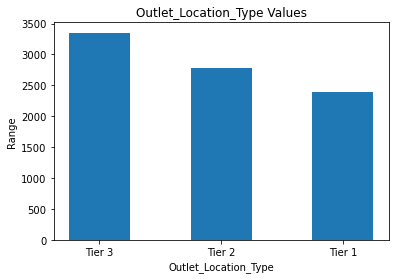

In [27]:
 train_bigmart['Outlet_Location_Type'].value_counts()
plt.bar(train_bigmart['Outlet_Location_Type'].value_counts().index, train_bigmart['Outlet_Location_Type'].value_counts(), width= 0.5, bottom=None , align='center', data=train_bigmart)
plt.title('Outlet_Location_Type Values')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Range')

Text(0, 0.5, 'Range')

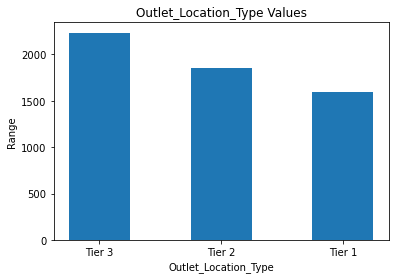

In [28]:
 test_bigmart['Outlet_Location_Type'].value_counts()
plt.bar(test_bigmart['Outlet_Location_Type'].value_counts().index, test_bigmart['Outlet_Location_Type'].value_counts(), width= 0.5, bottom=None , align='center', data=test_bigmart)
plt.title('Outlet_Location_Type Values')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Range')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

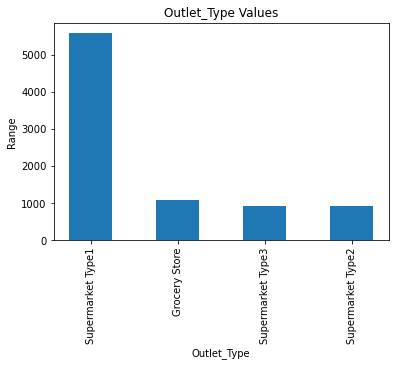

In [29]:
 train_bigmart['Outlet_Type'].value_counts()
plt.bar(train_bigmart['Outlet_Type'].value_counts().index, train_bigmart['Outlet_Type'].value_counts(), width= 0.5, bottom=None , align='center', data=train_bigmart)
plt.title('Outlet_Type Values')
plt.xlabel('Outlet_Type')
plt.ylabel('Range')
plt.xticks(rotation='vertical')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

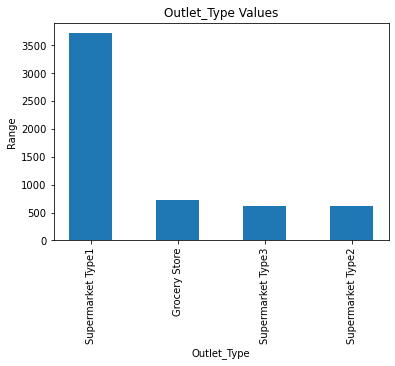

In [30]:
test_bigmart['Outlet_Type'].value_counts()
plt.bar(test_bigmart['Outlet_Type'].value_counts().index, test_bigmart['Outlet_Type'].value_counts(), width= 0.5, bottom=None , align='center', data=test_bigmart)
plt.title('Outlet_Type Values')
plt.xlabel('Outlet_Type')
plt.ylabel('Range')
plt.xticks(rotation='vertical')

In [31]:
train_bigmart['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [32]:
train_bigmart['Item_Visibility'].mask(train_bigmart['Item_Visibility']== 0,train_bigmart['Item_Visibility'].mean(),inplace=True)
test_bigmart['Item_Visibility'].mask(test_bigmart['Item_Visibility']== 0,test_bigmart['Item_Visibility'].mean(),inplace=True)

In [33]:
def num_years(col):
  return 2013-col

In [34]:
train_bigmart['Years_of_Operation']=train_bigmart['Outlet_Establishment_Year'].apply(num_years)
test_bigmart['Years_of_Operation']=test_bigmart['Outlet_Establishment_Year'].apply(num_years)

Text(0, 0.5, 'Range')

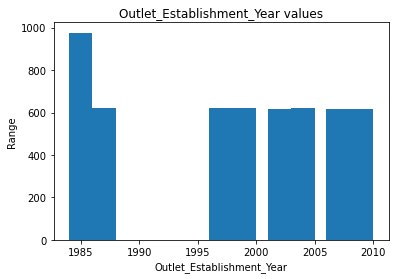

In [35]:
test_bigmart['Outlet_Establishment_Year'].value_counts()
plt.bar(test_bigmart['Outlet_Establishment_Year'].value_counts().index, test_bigmart['Outlet_Establishment_Year'].value_counts(), width= 2, bottom=None , data=test_bigmart)
plt.title('Outlet_Establishment_Year values')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Range')


In [36]:
# One hot encoding the categorical variables in both train and test set
train_item_type = pd.get_dummies(train_bigmart['Item_Type'])
train_item_fat_content = pd.get_dummies(train_bigmart['Item_Fat_Content'])
train_outlet_size = pd.get_dummies(train_bigmart['Outlet_Size'])
train_outlet_location_type = pd.get_dummies(train_bigmart['Outlet_Location_Type'])
train_output_type = pd.get_dummies(train_bigmart['Outlet_Type'])

test_item_type = pd.get_dummies(test_bigmart['Item_Type'])
test_item_fat_content = pd.get_dummies(test_bigmart['Item_Fat_Content'])
test_outlet_size = pd.get_dummies(test_bigmart['Outlet_Size'])
test_outlet_location_type = pd.get_dummies(test_bigmart['Outlet_Location_Type'])
test_output_type = pd.get_dummies(test_bigmart['Outlet_Type'])


In [37]:
train=train_bigmart
train=pd.concat([train,train_item_fat_content,train_item_type,train_outlet_size,train_outlet_location_type,train_output_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)
test=test_bigmart
test=pd.concat([test,test_item_fat_content,test_item_type,test_outlet_size,test_outlet_location_type,test_output_type],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)

In [38]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

In [39]:
#Feature Scaling

sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(x_test)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.15,random_state=42)

In [41]:
# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [43]:
predictions=lm.predict(x_val)

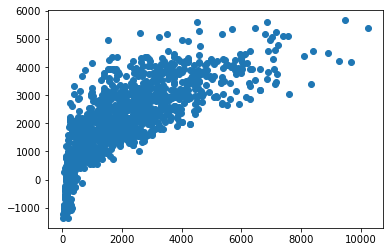

In [44]:
plt.scatter(y_val,predictions)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

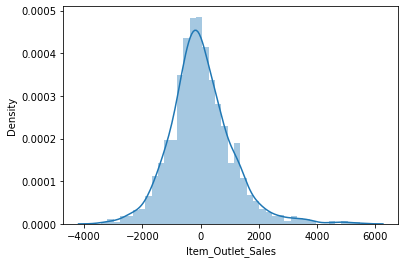

In [45]:
sns.distplot((y_val-predictions))

In [46]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  796.421453175601
Mean Squared Error:  1168724.8535729393
Root Mean Squared Error:  1081.075785305054
Explained Variance Score:  0.5846536722319351


In [47]:
rf=RandomForestRegressor(n_estimators=500,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=76, n_estimators=500,
                      n_jobs=4)

In [48]:
predictions1=rf.predict(x_val)

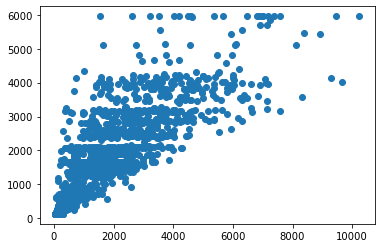

In [49]:
plt.scatter(y_val,predictions1)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

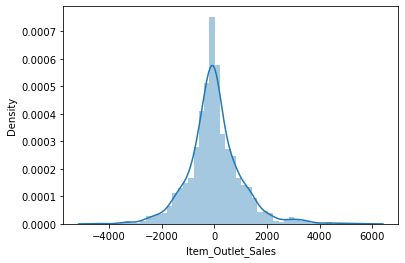

In [50]:
sns.distplot((y_val-predictions1))

In [51]:

print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions1))

Mean Absolute Error:  713.199758638325
Mean Squared Error:  1051911.3797328311
Root Mean Squared Error:  1025.6273103485648
Explained Variance Score:  0.6261333493496898


In [52]:
#Grid Search

# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    #'max_depth': range(1,15,1),
    #'min_samples_leaf': range(70,80,1),
    #'min_samples_split': [8, 10, 12],
    'n_estimators': range(100,500,100)
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = 4, verbose = 2,scoring='neg_mean_absolute_error')
# Fit the grid search to the data
grid_search.fit(x, y)

grid_search.best_params_,grid_search.best_score_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


({'n_estimators': 400}, -798.4102399635234)

In [53]:

data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.95,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=41, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.021, ...)

In [54]:
predictions2 = xg_reg.predict(x_val)

In [55]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions2))

Mean Absolute Error:  719.4399352269702
Mean Squared Error:  1069147.3678787975
Root Mean Squared Error:  1033.9958258517281
Explained Variance Score:  0.6203348863389386


In [56]:
from sklearn.model_selection import GridSearchCV
  
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)
}

gsearch1 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch1.fit(x,y)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, -758.6617346346264)

In [57]:
#Tuning Gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}

gsearch2 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)

gsearch2.fit(x,y)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, -758.6617346346264)

In [58]:
#Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}

gsearch3 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch3.fit(x,y)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.95, 'subsample': 0.8}, -758.5011730322874)

In [59]:
# Tuning Regularization Parameters
param_test4 = {
 'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]
}
gsearch4 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch4.fit(x,y)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.026}, -758.6617340812098)

In [60]:
# Tuning No. of trees
param_test5 = {
 'n_estimators':range(30,50,1)
}
gsearch5 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4, cv=10)
gsearch5.fit(x,y)
gsearch5.best_params_, gsearch5.best_score_

({'n_estimators': 38}, -758.4727135166303)

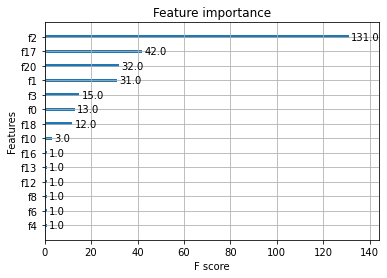

In [61]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [6, 8]
plt.show()


In [62]:
#Generating the Sales for the Test set and saving in a .csv file
pred_test = xg_reg.predict(x_test)
out_test_bigmart = pd.DataFrame({'Item_Identifier':test_bigmart['Item_Identifier'].values,'Outlet_Identifier':test_bigmart['Outlet_Identifier'].values})
out_test_bigmart['Item_Outlet_Sales'] = pred_test
out_test_bigmart.to_csv('predicted_bigmart_sales.csv', index=False)